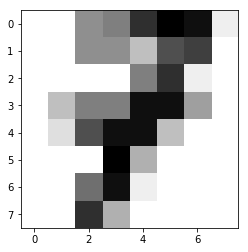

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt


digits = datasets.load_digits()
plt.imshow(digits.images[7],cmap="binary")# [] 안에 있는 숫자 바꾸면 숫자가 뜸
plt.show()
#dir(digits)
#print(digits.images[0])

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt


digits = datasets.load_digits()
print(digits.target[2]) #정답 확인

2


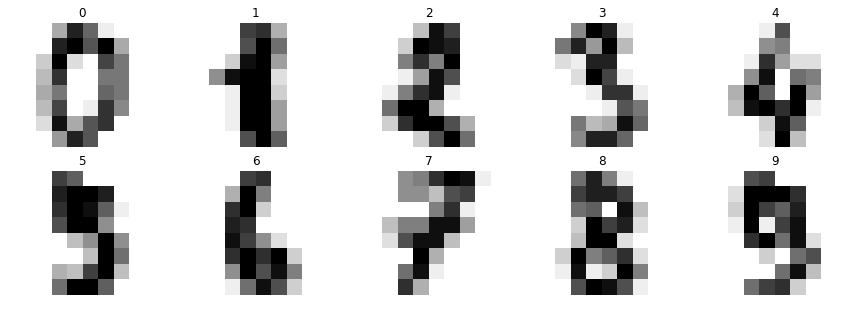

In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt


digits = datasets.load_digits()

fig = plt.figure(figsize =(15,5))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap="binary")
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#MLP multiplayer perceptron

digits = datasets.load_digits()

x = digits.images.reshape((len(digits.images),digits.images.shape[1]*digits.images.shape[2]))
# 일부러 이렇게 짜신거 64그대로 너도 됨

y = digits.target

x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]
# 사이킹런이 어떻게 input output node를 정해주는가 ??


In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,),
                   activation = 'logistic', #  activation은 매우 많다.
                   solver = 'sgd',
                   tol = 1e-4,  # 우리가 러닝을 했는대 더이상 낮아지지 않으면 공부 그만해 라는 뜻
                   learning_rate_init = .1,
                   verbose = True) 
# 보고 할 것인가 안할 것인가.

mlp.fit(x_train,y_train)

Iteration 1, loss = 2.23059717
Iteration 2, loss = 1.93015563
Iteration 3, loss = 1.63485332
Iteration 4, loss = 1.35265773
Iteration 5, loss = 1.09512239
Iteration 6, loss = 0.87745203
Iteration 7, loss = 0.70637342
Iteration 8, loss = 0.57606445
Iteration 9, loss = 0.47793564
Iteration 10, loss = 0.40957315
Iteration 11, loss = 0.35032603
Iteration 12, loss = 0.31328644
Iteration 13, loss = 0.27705328
Iteration 14, loss = 0.24877371
Iteration 15, loss = 0.22569419
Iteration 16, loss = 0.20854711
Iteration 17, loss = 0.19410982
Iteration 18, loss = 0.17790143
Iteration 19, loss = 0.17090039
Iteration 20, loss = 0.15799244
Iteration 21, loss = 0.15007257
Iteration 22, loss = 0.14240885
Iteration 23, loss = 0.13675153
Iteration 24, loss = 0.12790147
Iteration 25, loss = 0.11981502
Iteration 26, loss = 0.11562699
Iteration 27, loss = 0.11137647
Iteration 28, loss = 0.10796398
Iteration 29, loss = 0.10220960
Iteration 30, loss = 0.10092000
Iteration 31, loss = 0.09597605
Iteration 32, los

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [54]:
predictions = mlp.predict(x_test)
print(predictions[8:10])
print(y_test[0:10])

[1 7]
[1 4 0 5 3 6 9 6 1 7]


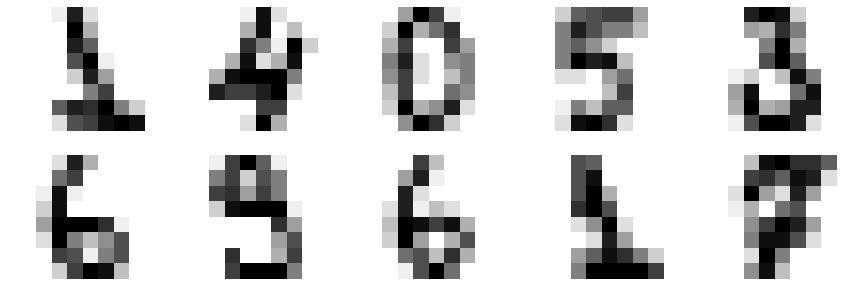

In [53]:
fig = plt.figure(figsize =(15,5))
for i in range(1000,1010):
    plt.subplot(2,5,i-999)
    plt.imshow(digits.images[i],cmap='binary')
    plt.axis('off')
plt.show()



In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[76,  0,  0,  0,  2,  0,  1,  0,  0,  0],
       [ 0, 71,  1,  0,  1,  1,  0,  0,  1,  5],
       [ 0,  0, 73,  2,  0,  0,  0,  2,  0,  0],
       [ 0,  2,  2, 62,  0,  1,  0,  3,  7,  2],
       [ 0,  0,  0,  0, 77,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  0, 80,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 77,  0,  1],
       [ 0,  3,  0,  0,  0,  4,  0,  1, 66,  2],
       [ 0,  1,  0,  1,  0,  1,  0,  4,  0, 74]], dtype=int64)

In [52]:
import pandas as pd
pd.crosstab(y_test,predictions, rownames = ['True'],colnames = ['Predicted'],margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,76,0,0,0,2,0,1,0,0,0,79
1,0,71,1,0,1,1,0,0,1,5,80
2,0,0,73,2,0,0,0,2,0,0,77
3,0,2,2,62,0,1,0,3,7,2,79
4,0,0,0,0,77,0,0,0,1,5,83
5,0,0,0,0,0,80,1,0,0,1,82
6,0,1,0,0,0,0,79,0,0,0,80
7,0,0,0,0,0,2,0,77,0,1,80
8,0,3,0,0,0,4,0,1,66,2,76


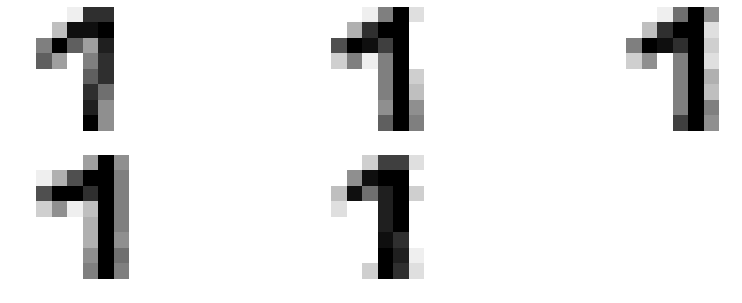

In [75]:
error = [] 
for i in range(0,len(predictions)):
    if predictions[i] == 9 and y_test[i] == 1:
        error.append(i+1000)


fig = plt.figure(figsize =(15,5))
for i in range(0,len(error)):
    plt.subplot(2,3,i+1)
    plt.imshow(digits.images[error[i]],cmap='binary')
    plt.axis('off')
plt.show()
